In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from WindPy import w
%matplotlib inline

In [20]:
w.start()
error_code, df = w.wsd("000001.SH", "close,open,high,low,chg,pct_chg,volume,amt", "2021-01-01", "2021-12-31", usedf=True)
print(df)

                CLOSE       OPEN       HIGH        LOW      CHG   PCT_CHG  \
2021-01-04  3502.9584  3474.6793  3511.6554  3457.2061  29.8891  0.860596   
2021-01-05  3528.6767  3492.1912  3528.6767  3484.7151  25.7183  0.734188   
2021-01-06  3550.8767  3530.9072  3556.8022  3513.1262  22.2000  0.629131   
2021-01-07  3576.2046  3552.9087  3576.2046  3526.6174  25.3279  0.713286   
2021-01-08  3570.1082  3577.6923  3588.0625  3544.8912  -6.0964 -0.170471   
...               ...        ...        ...        ...      ...       ...   
2021-12-27  3615.9741  3613.0469  3632.1880  3601.9351  -2.0794 -0.057473   
2021-12-28  3630.1115  3619.6419  3631.0766  3607.3643  14.1374  0.390971   
2021-12-29  3597.0002  3630.9159  3630.9159  3596.3225 -33.1113 -0.912129   
2021-12-30  3619.1886  3596.4921  3628.9177  3595.4957  22.1884  0.616858   
2021-12-31  3639.7754  3626.2420  3642.8430  3624.9419  20.5868  0.568824   

                  VOLUME           AMT  
2021-01-04  3.807908e+10  5.233677

In [21]:
df

,CLOSE,OPEN,HIGH,LOW,CHG,PCT_CHG,VOLUME,AMT
2021-01-04,3502.9584,3474.6793,3511.6554,3457.2061,29.8891,0.860596,3.807908e+10,5.233677e+11
2021-01-05,3528.6767,3492.1912,3528.6767,3484.7151,25.7183,0.734188,4.079959e+10,5.680195e+11
2021-01-06,3550.8767,3530.9072,3556.8022,3513.1262,22.2000,0.629131,3.702309e+10,5.217995e+11
2021-01-07,3576.2046,3552.9087,3576.2046,3526.6174,25.3279,0.713286,4.053482e+10,5.457096e+11
2021-01-08,3570.1082,3577.6923,3588.0625,3544.8912,-6.0964,-0.170471,3.455579e+10,5.021708e+11
...,...,...,...,...,...,...,...,...
2021-12-27,3615.9741,3613.0469,3632.1880,3601.9351,-2.0794,-0.057473,3.292353e+10,4.074826e+11
2021-12-28,3630.1115,3619.6419,3631.0766,3607.3643,14.1374,0.390971,3.162022e+10,4.087614e+11
2021-12-29,3597.0002,3630.9159,3630.9159,3596.3225,-33.1113,-0.912129,3.051318e+10,4.104253e+11
2021-12-30,3619.1886,3596.4921,3628.9177,3595.4957,22.1884,0.616858,3.078393e+10,4.139477e+11


In [22]:
our_df = df.CLOSE
our_df

2021-01-04    3502.9584
2021-01-05    3528.6767
2021-01-06    3550.8767
2021-01-07    3576.2046
2021-01-08    3570.1082
                ...    
2021-12-27    3615.9741
2021-12-28    3630.1115
2021-12-29    3597.0002
2021-12-30    3619.1886
2021-12-31    3639.7754
Name: CLOSE, Length: 243, dtype: float64

1）AF（Autocovariance Function）时间序列与其滞后项的协方差。
X为随机变量，E为数学期望，u均值。【理解：每个X相当于一个维度，即DataFrame里的某一列都是这个维度内的元素】
有<br>
$AF_k = E [(X_t - \mu_t)(X_{t-k} - \mu_{t-k})] = Cov(X_t,X_{t-k})$

2）ACF（Autocorrelation Coefficient Function）
ACF去除了AF量纲的影响<br>
$ACF_k = \frac{Cov(X_t,X_{t-k})}{Var(X_t)}$

3）PACF（Partial Autocorrelation Coefficient Function）<br>
$PACF_t = Corr(X_t,X_{t-k}|X_{t-1},X_{t-2},...,X_{t-(k-1)})$

$X_t = \Phi_{k1} X_{t-1} + \Phi_{k2} X_{t-2} +...+ \Phi_{kk} X_{t-k} $

$PACF(X_t, k) = \frac
{Covariance(
[ X_t | X_{t-1} , X_{t-2} , ... , X_{t-(k-1)} ],
[ X_{t-k} | X_{t-1} , X_{t-2} , ... , X_{t-(k-1)} ]
)}
{
\sigma_{ [ X_t | X_{t-1} , X_{t-2} , ... , X_{t-(k-1)} ] }
\times
\sigma_{ [ X_{t-k} | X_{t-1} , X_{t-2} , ... , X_{t-(k-1)} ] }
}$

<img alt="pic_Partial_autocorrelation_function.png" height="160" src="pic_Partial_autocorrelation_function.png" width="1000"/>

建议阅读百科了解PACF
https://en.wikipedia.org/wiki/Partial_autocorrelation_function

In [23]:
import statsmodels.tsa.api as smt

In [24]:
acf = smt.stattools.acf(our_df, nlags=20)
pacf = smt.stattools.pacf(our_df, nlags=20)

C:\Users\MI\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [25]:
acf

array([1.        , 0.90977736, 0.83013735, 0.74247317, 0.67431895,
       0.59609642, 0.5560192 , 0.51129003, 0.46500362, 0.41746936,
       0.38580272, 0.35556257, 0.31957078, 0.29353754, 0.27382726,
       0.25905375, 0.24410542, 0.21939426, 0.18859655, 0.1589333 ,
       0.12581259])

In [26]:
pacf

array([ 1.        ,  0.91353677,  0.01497138, -0.09146378,  0.06239635,
       -0.09253756,  0.17401935, -0.02748628, -0.0736313 ,  0.00343904,
        0.04358592,  0.02996439, -0.07080554,  0.03365704,  0.02848028,
        0.03539523,  0.00622652, -0.11246   , -0.03885112,  0.01039957,
       -0.04507341])

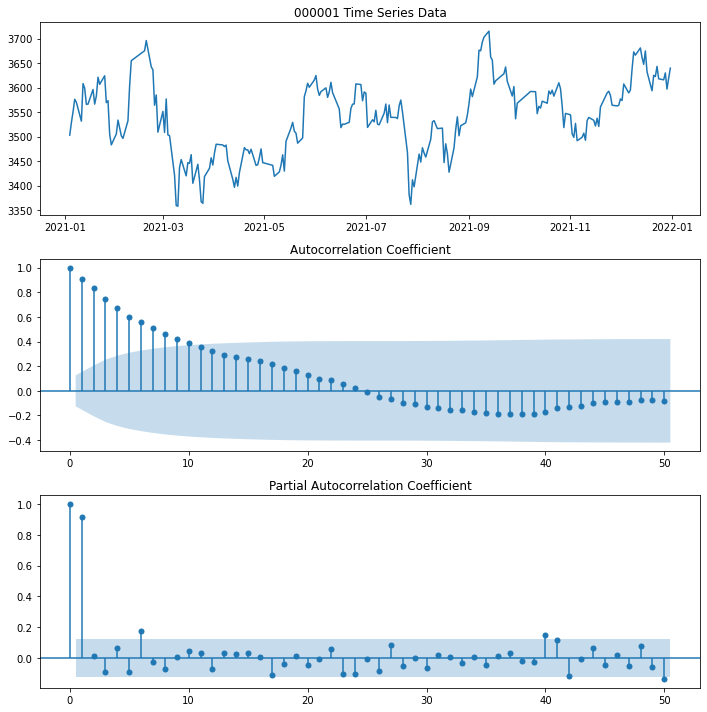

In [31]:
plt.style.context("bmh")
fig = plt.figure(figsize=(10,10))
layout = (3,1)
wd_ax = plt.subplot2grid(layout,(0,0))
acf_ax = plt.subplot2grid(layout,(1,0))
pacf_ax = plt.subplot2grid(layout,(2,0))

our_df.plot(ax = wd_ax)
wd_ax.set_title("000001 Time Series Data")

smt.graphics.plot_acf(our_df,lags=50,ax=acf_ax,alpha=0.05)
acf_ax.set_title("Autocorrelation Coefficient")

smt.graphics.plot_pacf(our_df,lags=50,ax=pacf_ax,alpha=0.05)
pacf_ax.set_title("Partial Autocorrelation Coefficient")

plt.tight_layout()

先验证平稳性(stationary)，然后才可以应用时间序列模型。分严平稳性（联合分布不变）、弱平稳性（一阶矩和二阶矩不变、无季节性）。<br>
https://zh.wikipedia.org/wiki/%E5%B9%B3%E7%A8%B3%E8%BF%87%E7%A8%8B <br>
验证方式：<br>
1.Visually <br>
2.Global vs Local Tests  <br>
3.Augumented Dicke-Filler Test  <br>
当不满足上述弱平稳的验证时，可以通过N阶差分实现（下例以残差为白噪声情况演示）  <br>

<img alt="pic_N_order_difference.jpg" height="550" src="pic_N_order_difference.jpg" width="1200"/>

白噪声:<br>
完全随机序列，在任意一个时间t，满足以下仨条件：<br>
$E(X_t) = 0 $ <br>
$V(X_t) = \sigma ^2 $ <br>
$ACF_k = 0 $ <br>

需要指出，相关性和概率分布是两个不相关的概念。“白色”仅意味着信号是不相关的，白噪声的定义除了要求均值为零外并没有对信号应当服从哪种概率分布作出任何假设。因此，如果某白噪声过程服从高斯分布，则它是“高斯白噪声”。类似的，还有泊松白噪声、柯西白噪声等。<br>
高斯白噪声（Gusssian White Noise)，强平稳，无法预测。<br>
https://zh.wikipedia.org/wiki/%E7%99%BD%E9%9B%9C%E8%A8%8A

白噪声公式：<br>
$ x_t = x_{t-1} + \varepsilon_t  $ <br>
$ x_0 = 0 , \varepsilon_{t} \sim N(0, \sigma_{\varepsilon^2})$

In [38]:
# 画 white noise
np.random.seed(8)

random_data_array = np.random.normal(size=250)
type(random_data_array)

numpy.ndarray

In [39]:
random_data_series = pd.Series(random_data_array)
type(random_data_array)

numpy.ndarray

<AxesSubplot:>

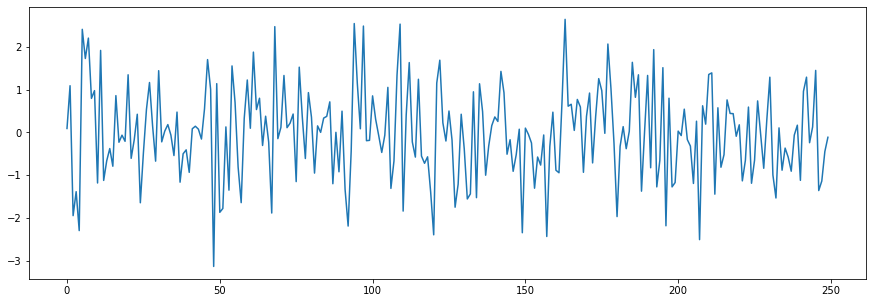

In [43]:
plt.style.context("bmh")
fig = plt.figure(figsize = (15,5))
random_data_series.plot()

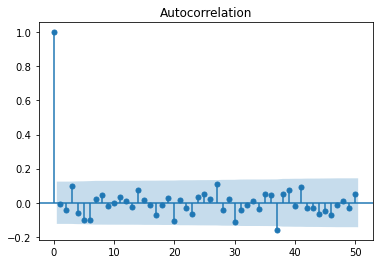

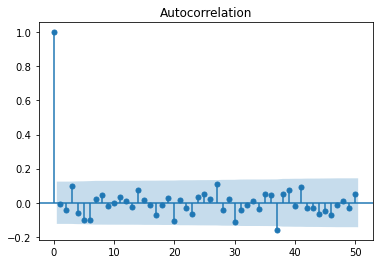

In [44]:
smt.graphics.plot_acf(random_data_series, lags=50)